In [1]:
import os
import folium
import pandas as pd
import json
import requests
import numpy as np

#folium.GeoJson(open('nta.json').read()).add_to(m)

#bkln_data = pd.read_csv('bike_lanes.csv')
#bkln_data = pd.read_csv('combined_geo_regression_data.csv')


In [27]:
allnta = pd.read_csv('bike_lanes.csv')
allnta.head()

NTACode  Count  Length_1  Length_T
0    BK88     10  0.802165  0.965636
1    QN52     12  0.136835  0.626597
2    QN48    102  2.167839  3.322510
3    QN51     24  0.000000  1.333101
4    QN27     42  0.433633  3.161372

In [2]:
bkln_data = pd.read_csv('combined_geo_regression_data.csv')
bkln_data

nta_code        borough  population  median_age  median_income  \
0       BK09       Brooklyn       24140        37.2       116189.0   
1       BK17       Brooklyn       66293        43.7        54371.0   
2       BK19       Brooklyn       34157        44.3        35699.0   
3       BK21       Brooklyn       29677        39.8        26033.0   
4       BK23       Brooklyn       15754        57.8        40910.0   
5       BK25       Brooklyn       44516        33.6        52093.0   
6       BK26       Brooklyn       30288        40.4        38573.0   
7       BK27       Brooklyn       33163        38.3        58243.0   
8       BK28       Brooklyn       91646        37.8        51035.0   
9       BK29       Brooklyn       64267        39.6        48097.0   
10      BK30       Brooklyn       45877        38.9        56310.0   
11      BK31       Brooklyn       79134        39.5        63539.0   
12      BK32       Brooklyn       57377        32.8        47397.0   
13      BK33       Brooklyn       42463        36.5        91757.0   
14      BK34       Brooklyn       71850        32.6        39200.0   
15      BK35       Brooklyn       67371        33.2        41269.0   
16      BK37       Brooklyn       73881        35.4       113781.0   
17      BK38       Brooklyn       42245        34.1        94542.0   
18      BK40       Brooklyn       22031        37.5        91219.0   
19      BK41       Brooklyn       37676        32.8        54163.0   
20      BK42       Brooklyn      108653        34.3        48896.0   
21      BK43       Brooklyn       53377        34.6        46598.0   
22      BK44       Brooklyn       40122        41.5        58966.0   
23      BK45       Brooklyn       47997        40.4        80660.0   
24      BK46       Brooklyn       21253        31.2        54104.0   
25      BK50       Brooklyn       88367        37.1        62263.0   
26      BK58       Brooklyn       72540        37.5        69459.0   
27      BK60       Brooklyn       69363        36.0        43485.0   
28      BK61       Brooklyn      107134        33.7        40678.0   
29      BK63       Brooklyn       41962        32.3        46357.0   
..       ...            ...         ...         ...            ...   
165     QN61         Queens       55597        35.2        42970.0   
166     QN62         Queens       21460        39.9        55740.0   
167     QN63         Queens       45702        38.1        51485.0   
168     QN66         Queens       26924        40.6        81795.0   
169     QN68         Queens       18927        35.6        28870.0   
170     QN70         Queens       77252        35.1        59453.0   
171     QN71         Queens       28110        34.2        55087.0   
172     QN72         Queens       48179        35.6        64259.0   
173     QN76         Queens       39079        35.0        62609.0   
174     QN98         Queens           0         NaN            NaN   
175     QN99         Queens         366        40.8        58460.0   
176     SI01  Staten Island       28698        42.8        92853.0   
177     SI05  Staten Island       40907        41.6        76123.0   
178     SI07  Staten Island       24131        40.9        79491.0   
179     SI08  Staten Island       21636        33.5        55814.0   
180     SI11  Staten Island       24794        38.1        86645.0   
181     SI12  Staten Island       29956        33.1        59106.0   
182     SI14  Staten Island       15896        40.0        74103.0   
183     SI22  Staten Island       33175        35.0        48899.0   
184     SI24  Staten Island       32276        43.8        83355.0   
185     SI25  Staten Island       20618        45.5        75638.0   
186     SI28  Staten Island       19141        34.4        62339.0   
187     SI32  Staten Island       21397        40.5        93405.0   
188     SI35  Staten Island       18083        39.4        72283.0   
189     SI36  Staten Island       24927        40.7        65994.0   
190     SI37  

In [3]:
bkln_data.rename(columns={"nta_code":"NTACode"}, inplace=True)

In [6]:
m = folium.Map([40.5, -74.2], zoom_start=10)

folium.Choropleth(
    geo_data='nta.json',
    name='choropleth',
    data=bkln_data,
    columns=['NTACode', 'subway_entries'],
    key_on='feature.properties.NTACode',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of subway entries'
).add_to(m)


m

In [32]:
bkln_data.columns

Index(['NTACode', 'borough', 'population', 'median_age', 'median_income',
       'mean_income', 'bs_av_trip_duration', 'bs_med_trip_duration',
       'bs_med_age', 'bs_av_age', 'bs_male_proportion',
       'bs_subscriber_proportion', 'bs_number_rides', 'bs_number_startstation',
       'green_num_rides', 'green_med_pass', 'green_med_dist', 'green_avg_cost',
       'green_med_cost', 'yellow_num_rides', 'yellow_med_pass',
       'yellow_med_dist', 'yellow_avg_cost', 'yellow_med_cost', 'rs_num_rides',
       'rs_prop_shared', 'rs_num_w_dist', 'rs_mean_dist', 'rs_med_distance',
       'lane_protected', 'lane_total', 'subway_entries'],
      dtype='object')

In [3]:
df_combined = pd.read_csv("combined_geo_regression_data.csv")
df_combined.tail()

nta_code        borough  population  median_age  median_income  \
190     SI37  Staten Island       26247        36.0        53120.0   
191     SI45  Staten Island       21358        40.1        77658.0   
192     SI48  Staten Island       26482        40.0        84490.0   
193     SI54  Staten Island       43602        42.4        91161.0   
194     SI99  Staten Island           0         NaN            NaN   

     mean_income  bs_av_trip_duration  bs_med_trip_duration  bs_med_age  \
190      70987.0                  NaN                   NaN         NaN   
191      92357.0                  NaN                   NaN         NaN   
192     101280.0                  NaN                   NaN         NaN   
193     101281.0                  NaN                   NaN         NaN   
194          NaN                  NaN                   NaN         NaN   

     bs_av_age  ...  yellow_avg_cost  yellow_med_cost  rs_num_rides  \
190        NaN  ...              NaN              NaN         700.0   
191        NaN  ...              NaN              NaN         357.0   
192        NaN  ...              NaN              NaN         134.0   
193        NaN  ...              NaN              NaN         386.0   
194        NaN  ...              NaN              NaN          47.0   

     rs_prop_shared  rs_num_w_dist  rs_mean_dist  rs_med_distance  \
190        0.081429          475.0      3.629480         1.715994   
191        0.039216          223.0      5.149360         2.657678   
192        0.067164           92.0      5.314360         4.408696   
193        0.049223          254.0      6.413420         5.771813   
194        0.042553           41.0      9.308842         6.724161   

     lane_protected  lane_total  subway_entries  
190        0.000000    0.438608               0  
191        1.691713    8.979065               0  
192        1.785098    2.791879               0  
193        0.544206    2.827328               0  
194        0.377357    0.593915               0  

[5 rows x 32 columns]

In [4]:
df_combined.isnull().sum()

nta_code                      0
borough                       0
population                    0
median_age                    2
median_income                 4
mean_income                   4
bs_av_trip_duration         149
bs_med_trip_duration        149
bs_med_age                  149
bs_av_age                   149
bs_male_proportion          149
bs_subscriber_proportion    149
bs_number_rides             149
bs_number_startstation      149
green_num_rides              17
green_med_pass               17
green_med_dist               17
green_avg_cost               17
green_med_cost               17
yellow_num_rides             29
yellow_med_pass              29
yellow_med_dist              29
yellow_avg_cost              29
yellow_med_cost              29
rs_num_rides                  6
rs_prop_shared                6
rs_num_w_dist                 6
rs_mean_dist                  6
rs_med_distance               6
lane_protected                0
lane_total                    0
subway_e

In [11]:
temp = df_combined.drop(columns=["bs_av_trip_duration","bs_med_trip_duration","bs_med_age",
                                "bs_av_age","bs_male_proportion","bs_subscriber_proportion",
                                "bs_number_rides","bs_number_startstation"])

In [12]:
temp = temp.dropna()

In [14]:
temp.columns

Index(['nta_code', 'borough', 'population', 'median_age', 'median_income',
       'mean_income', 'green_num_rides', 'green_med_pass', 'green_med_dist',
       'green_avg_cost', 'green_med_cost', 'yellow_num_rides',
       'yellow_med_pass', 'yellow_med_dist', 'yellow_avg_cost',
       'yellow_med_cost', 'rs_num_rides', 'rs_prop_shared', 'rs_num_w_dist',
       'rs_mean_dist', 'rs_med_distance', 'lane_protected', 'lane_total',
       'subway_entries'],
      dtype='object')

In [15]:
from scipy.stats import pearsonr, spearmanr

In [17]:
temp.corr()['lane_total']

population          0.213729
median_age         -0.042653
median_income       0.335957
mean_income         0.457392
green_num_rides     0.096724
green_med_pass      0.135481
green_med_dist     -0.335244
green_avg_cost     -0.266628
green_med_cost     -0.234368
yellow_num_rides    0.363052
yellow_med_pass    -0.120344
yellow_med_dist    -0.238459
yellow_avg_cost    -0.192653
yellow_med_cost    -0.205136
rs_num_rides        0.518566
rs_prop_shared     -0.103237
rs_num_w_dist       0.525073
rs_mean_dist       -0.048038
rs_med_distance     0.017043
lane_protected      0.703107
lane_total          1.000000
subway_entries      0.691872
Name: lane_total, dtype: float64

In [18]:
pearsonr(temp["lane_total"], temp["mean_income"])

(0.4573922267922073, 1.0630929910839951e-09)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 24
mpl.rcParams['legend.fontsize'] = 'x-small'

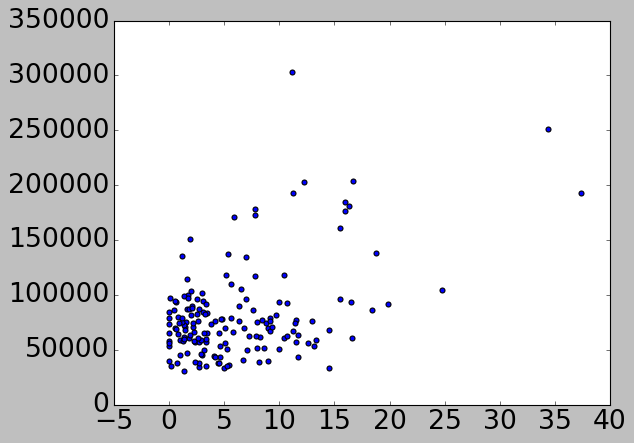

In [23]:
plt.scatter(temp["lane_total"], temp["mean_income"])